In [16]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget


In [20]:
def LoadData(paths):

    dfs = []

    # Loop over each file path
    for file_path in paths:
        # Read the file into a DataFrame
        df = pd.read_csv(file_path, sep='\t', skiprows=2, decimal=',', encoding='ISO-8859-1')

        for col in df.columns:
            if (col != "Date" and col != "Hour"):
                df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Append the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    df = pd.concat(dfs, ignore_index=True)


    # Convert the 'Date' and 'Hour' columns to a single datetime column
    df['Datetime'] = pd.to_datetime(
        df['Date'] + ' ' + df['Hour'],
        format='%d/%m/%Y %H:%M:%S',  # Adjust format according to your data
        dayfirst=True
    )

    # Display the final DataFrame
    print(df.head())

    df.set_index('Datetime', inplace=True)
    df = df.sort_index()

    df = df.select_dtypes(include=[np.number])

    df_mean = df.copy()
    df_mean = df_mean.resample('h').mean()

    # Display the final DataFrame
    print(df_mean.head())

    return df, df_mean

def PlotHV(ax1, varname, df_mean, df, col):

    ax1.plot(df.index, df[f'{varname}'], linestyle='-', color = col, alpha = 0.3)
    # ax1.plot(df_mean.index, df_mean[f'{varname}'], linestyle='-', color = "k", label = "Hourly Mean")
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{varname}')
    ax1.set_title(f"{varname}")

    for label in ax1.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

    # ax1.legend()

In [22]:
HHV_files ='/Users/mistryk2/Desktop/Files/HV_Data/'

# Number of days to look back
N_days = 45

cathode_paths = sorted(glob.glob(f"{HHV_files}/*CATHODE*.txt"), reverse = True)[0:N_days]
gate_paths    = sorted(glob.glob(f"{HHV_files}/*GATE*.txt"), reverse = True)[0:N_days]
LR_paths      = sorted(glob.glob(f"{HHV_files}/*LAST_RING*.txt"), reverse = True)[0:N_days]

Cath_HV, Cath_HVMean = LoadData(cathode_paths)
Gate_HV, Gate_HVMean = LoadData(gate_paths)
LR_HV, LR_HVMean     = LoadData(LR_paths)

print("Printing Cathode HV...")
display(Cath_HV)

         Date      Hour  Voltage (V)  Current (mA)            Datetime
0  10/08/2024  23:59:37         -3.1      -0.00006 2024-08-10 23:59:37
1  10/08/2024  23:59:39         -3.1      -0.00006 2024-08-10 23:59:39
2  10/08/2024  23:59:41         -3.0      -0.00006 2024-08-10 23:59:41
3  10/08/2024  23:59:43         -3.1      -0.00007 2024-08-10 23:59:43
4  10/08/2024  23:59:45         -3.0      -0.00006 2024-08-10 23:59:45
                      Voltage (V)  Current (mA)
Datetime                                       
2024-08-05 23:00:00  14697.238462      0.004661
2024-08-06 00:00:00  14697.285833      0.004661
2024-08-06 01:00:00  14697.289833      0.004661
2024-08-06 02:00:00  14697.323111      0.004661
2024-08-06 03:00:00  14697.321833      0.004661
         Date      Hour  Voltage (V)  Current (mA)            Datetime
0  10/08/2024  23:59:37         -0.3       0.00016 2024-08-10 23:59:37
1  10/08/2024  23:59:39         -0.3       0.00016 2024-08-10 23:59:39
2  10/08/2024  23:59:41  

,Voltage (V),Current (mA)
Datetime,,
2024-08-05 23:59:08,14697.2,0.00466
2024-08-05 23:59:10,14697.1,0.00467
2024-08-05 23:59:12,14697.2,0.00467
2024-08-05 23:59:14,14697.2,0.00466
2024-08-05 23:59:16,14697.3,0.00466
...,...,...
2024-08-11 17:38:32,-3.0,-0.00006
2024-08-11 17:38:34,-3.1,-0.00006
2024-08-11 17:38:36,-3.0,-0.00006


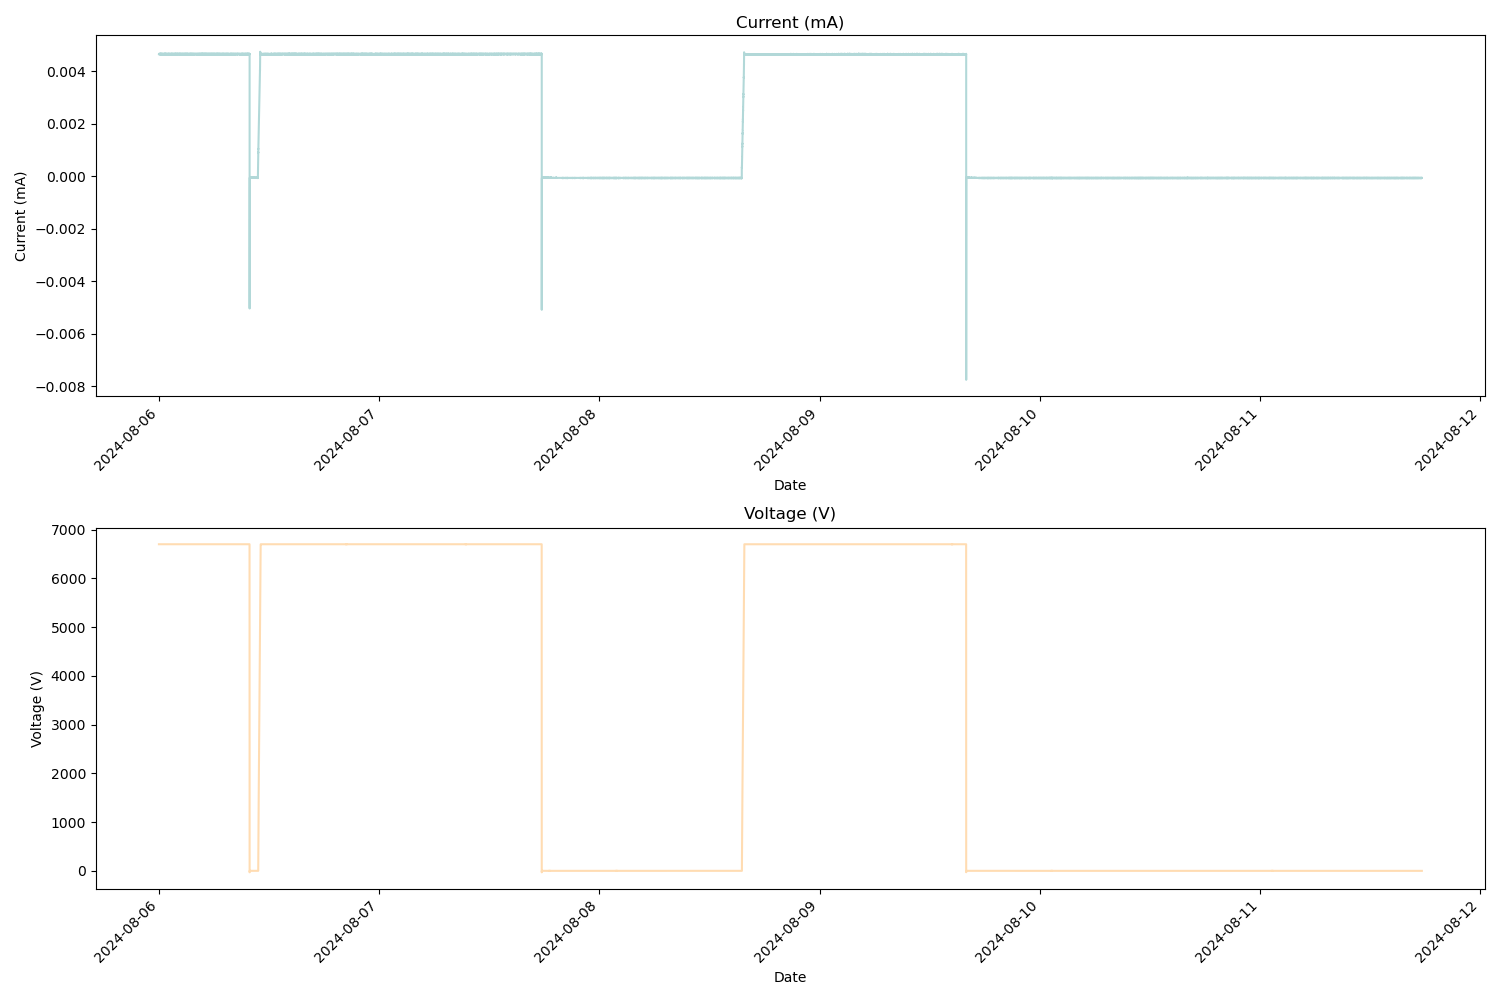

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15, 10))

PlotHV(ax1, "Current (mA)", Cath_HVMean, Cath_HV, "Teal")
PlotHV(ax2, "Voltage (V)", Cath_HVMean, Gate_HV, "DarkOrange")

plt.tight_layout()
